In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
file_json_full = 'ftp://atviriduomenys.nvsc.lt/COVID19.json'
json_data_full = pd.read_json(file_json_full)

In [2]:
json_data_full['Atvejo patvirtinimo data'] = pd.to_datetime(json_data_full['Atvejo patvirtinimo data'])
json_data_full_mire = json_data_full[json_data_full['Išeitis'] == 'Mirė']
df1 = json_data_full_mire.groupby(['Atvejo patvirtinimo data']).Lytis.count()

display(df1.resample('Y', level=0).sum())
Covid_death2020 = df1.resample('Y', level=0).sum()[0]

Atvejo patvirtinimo data
2020-12-31    2046
2021-12-31     250
Freq: A-DEC, Name: Lytis, dtype: int64

In [3]:
json_data_full['Išeitis'].replace('Nesirgo', 'Kita', inplace = True)
json_data_full['Išeitis'].replace('', 'Kita', inplace = True)
percent_of_all = json_data_full['Išeitis'].value_counts(normalize = True)*100
percent_of_all = pd.DataFrame(percent_of_all).reset_index()

percent_of_all['index'].replace('Gydomas', 'In treatment', inplace = True)
percent_of_all['index'].replace('Pasveiko', 'Recovered', inplace = True)
percent_of_all['index'].replace('Mirė', 'Died', inplace = True)
percent_of_all['index'].replace('Kita', 'Other', inplace = True)

percent_of_all

#percent_of_all['index'][1]
#percent_of_all['Išeitis'][1]

,index,Išeitis
0,Recovered,62.076968
1,In treatment,35.699196
2,Died,1.366317
3,Other,0.857519


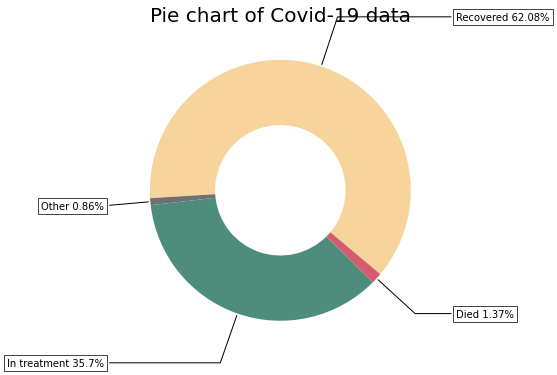

In [4]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

recipe = [percent_of_all['index'][0],percent_of_all['index'][3], percent_of_all['index'][1], percent_of_all['index'][2]]

data = [percent_of_all['Išeitis'][0],percent_of_all['Išeitis'][3], percent_of_all['Išeitis'][1], percent_of_all['Išeitis'][2]]
palette = ["#f8d49d","#707070","#4e8d7c",'#d35d6e']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors = palette)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i]+' '+str(round(data[i],2)) + "%", 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),                
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie chart of Covid-19 data", fontsize =20 )

plt.show()

In [5]:
json_data_completed = json_data_full[json_data_full['Išeitis'].isin(['Pasveiko', 'Mirė'])]
percent_of_completed = json_data_completed['Išeitis'].value_counts(normalize = True)*100
percent_of_completed

Pasveiko    97.846396
Mirė         2.153604
Name: Išeitis, dtype: float64

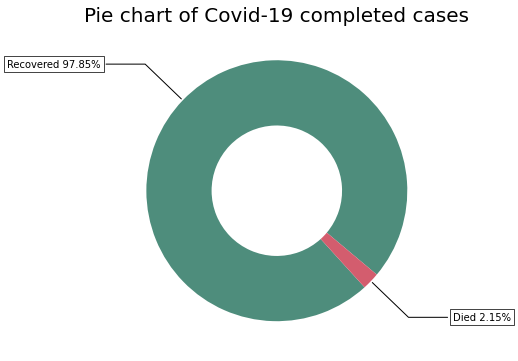

In [6]:
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw=dict(aspect="equal"))

recipe = ['Recovered', 'Died']

data = [percent_of_completed[0], percent_of_completed[1]]
palette = ["#4e8d7c",'#d35d6e']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors = palette)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i]+' '+str(round(percent_of_completed[i],2)) + "%", 
                xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Pie chart of Covid-19 completed cases", fontsize = 20)

plt.show()

In [7]:
json_data_full['Išeitis'].count()

168043

In [8]:
file = r'C:\Users\Kęstas\Desktop\Data Science project\Covid ep\data-table.csv'
stat_full = pd.read_csv(file)
stat_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Laikotarpis                   6162 non-null   int64  
 1   Rodiklis                      6162 non-null   object 
 2   Apskritys                     6162 non-null   object 
 3   Amžius (5 m. amžiaus grupės)  6162 non-null   object 
 4   Lytis                         6162 non-null   object 
 5   Savaitė                       6162 non-null   object 
 6   Matavimo vienetai             6162 non-null   object 
 7   Reikšmė                       6084 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 385.2+ KB


In [12]:
LT_population = 2794000
stat_full.head()

,Laikotarpis,Rodiklis,Apskritys,Amžius (5 m. amžiaus grupės),Lytis,Savaitė,Matavimo vienetai,Reikšmė
0,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai ir moterys,1 savaitė,asmenys,826.0
1,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai,1 savaitė,asmenys,404.0
2,2018,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Moterys,1 savaitė,asmenys,422.0
3,2019,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai ir moterys,1 savaitė,asmenys,842.0
4,2019,Savaitinis mirusiųjų skaičius,Lietuvos Respublika,Iš viso pagal amžių,Vyrai,1 savaitė,asmenys,419.0


In [10]:

mortality2019 = stat_full[(stat_full['Laikotarpis']==2019) 
          & (stat_full['Rodiklis']=='Mirusiųjų skaičius pagal mirties priežastis')].sort_values(by = ['Reikšmė'], ascending  = False)

In [11]:
mortality2019 = mortality2019[['Mirties priežasčių grupės (14)', 'Reikšmė']]
mortality2019 = mortality2019[~(mortality2019['Mirties priežasčių grupės (14)']=='Iš viso pagal mirties priežastis')]
mortality2019

KeyError: "['Mirties priežasčių grupės (14)'] not in index"

In [ ]:
Covid_death2020_dict = {'Mirties priežasčių grupės (14)' : 'Covid19_2020',
    'Reikšmė' : Covid_death2020 }
c = pd.DataFrame(Covid_death2020_dict, index = [0])

In [ ]:
adapted_table = pd.concat([mortality2019, c])

In [ ]:
Total = adapted_table['Reikšmė'].sum()

In [ ]:
adapted_table['prop'] = round(adapted_table['Reikšmė']/Total*100,2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot( x='Reikšmė',y='Mirties priežasčių grupės (14)', 
                data=adapted_table, 
                kind="bar", ci=None,
                height=5, aspect=3, palette=["#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c",
                                            "#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c","#4e8d7c",
                                            '#d35d6e'])


plt.title('Death numbers with reasons in 2019 plus Covid - 19 death numbers', fontsize =20 )

In [ ]:
file1 = r'C:\Users\Kęstas\Desktop\Data Science project\Covid ep\data-table-agg.csv'
stat_agg = pd.read_csv(file1)
stat_agg.head()


In [ ]:
filter1 = stat_agg['Laikotarpis']==2019
filter2 = stat_agg['Laikotarpis']==2020
filter3 = stat_agg['Rodiklis'] =='Savaitinis mirusiųjų skaičius'
filter4 = stat_agg['Apskritys'] == 'Lietuvos Respublika'
filter5 = stat_agg['Lytis'] == 'Vyrai ir moterys'

In [ ]:
stat_agg2019 = stat_agg[filter1  & filter3 & filter4 & filter5]
stat_agg2019.head()

In [ ]:
stat_agg2020 = stat_agg[filter2  & filter3 & filter4 & filter5]
stat_agg2020.tail()

In [ ]:
df11 = pd.merge(stat_agg2019[['Savaitė','Laikotarpis','Reikšmė']], stat_agg2020[['Savaitė','Laikotarpis','Reikšmė']], on = "Savaitė", how = "inner")

In [ ]:
Covid_death2020_weekly = df1.resample('W', level=0).sum()
Covid_death2020_weekly = pd.DataFrame(Covid_death2020_weekly)
Covid_death2020_weekly["Savaitė"] = Covid_death2020_weekly.index.week
Covid_death2020_weekly = Covid_death2020_weekly.rename(columns = {'Lytis': "Total_death_covid"})

In [ ]:
df11['Savaitė'] = df11['Savaitė'].str.replace(" savaitė","").astype('int')


In [ ]:
Final_table = pd.merge(df11, Covid_death2020_weekly, on = "Savaitė", how = "left").fillna(0)
Final_table['Reikšmė2020withoutcovid'] = Final_table['Reikšmė_y'] - Final_table['Total_death_covid']
Final_table.tail()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(15,7),facecolor = "#F5F5F5")

plt.plot(Final_table['Savaitė'], Final_table['Reikšmė_x'], label = "2019 deaths", color = '#433d3c')
plt.plot(Final_table['Savaitė'],Final_table['Reikšmė_y'],label = "2020 deaths with covid - 19", color = '#00303f')
plt.plot(Final_table['Savaitė'],Final_table['Reikšmė2020withoutcovid'],label = "2020 deaths without covid - 19", color = 'red')

ax.set_ylim(0, 1500)
ax.set_title('Covid-19 influence on mortality in Lithuania', fontsize =20)


X = np.array(Final_table['Savaitė'])

Y1 = np.array(Final_table['Reikšmė_x'])
Y2 = np.array(Final_table['Reikšmė_y'])
Y3 = np.array(Final_table['Reikšmė2020withoutcovid'])
#ax.fill_between(X, Y1,Y2,color='#fff3b2',alpha=.1)
ax.fill_between(X, Y2,Y3,color='#f0e2d0')
#ax.fill_between(X, Y3,0,color='#fff3b2',alpha=.1)

plt.annotate(' Week 31'
             ,xy = (31,600)
             ,xytext = (31,400),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(' Week 39'
             ,xy = (39,750)
             ,xytext = (39,900),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.legend()
